In [1]:
pip install pytrends


  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16124 sha256=752b15d847411db6f70ca96a350d6796b4a71b5fdb57a12b63ea9b6c09550ebd
  Stored in directory: c:\users\peeta\appdata\local\pip\cache\wheels\07\6f\5c\8174f98dec1bfbc7d5da4092854afcbcff4b26c3d9b66b5183
Successfully built pytrends


In [290]:
import tweepy
import pandas as pd
client = tweepy.Client("AAAAAAAAAAAAAAAAAAAAAGvbawEAAAAAxvxnJu9E%2F%2FPCe5Oz0irJC5BDvZM%3DEsqky8zPsYhadIeHKzCVsaB0UXGz28FFb2UBqtnNDOJkmfAkfN")
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from datetime import datetime
import re
import yfinance as yf
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
api =tweepy.API("AAAAAAAAAAAAAAAAAAAAAGvbawEAAAAAxvxnJu9E%2F%2FPCe5Oz0irJC5BDvZM%3DEsqky8zPsYhadIeHKzCVsaB0UXGz28FFb2UBqtnNDOJkmfAkfN",wait_on_rate_limit=True)

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\peeta\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [25]:
pip install plotly

In [249]:
from pytrends.request import TrendReq

In [63]:
import pandas as pd

In [49]:
pip install yfinance

  Using cached yfinance-0.1.70-py2.py3-none-any.whl (26 kB)
  Using cached multitasking-0.0.10-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [50]:
import yfinance as yf

In [125]:
import numpy as np

In [185]:
from datetime import datetime

In [421]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [70]:
def normil(df):
    df = (df-df.min())/(df.max()-df.min())
    return df

In [224]:
def comparison(phrase, ticker):
    pytrends=TrendReq(hl='en-US', tz=360)
    pytrends.build_payload([phrase], cat=0, timeframe='today 3-m')
    data = pytrends.interest_over_time() 
    ndata=normil(data[phrase][0:-2])
    lunaprice = yf.Ticker(ticker)
    lunaprice = lunaprice.history(
        start='2022-02-28',
        end='2022-05-30',
        interval='60m'
    )
    lunaprice = lunaprice['Close']
    nlunaprice=normil(lunaprice)
    return ndata.plot(), nlunaprice.plot()

In [241]:
def comparisonSS(phrase, ticker):
    pytrends=TrendReq(hl='en-US', tz=360)
    pytrends.build_payload([phrase], cat=0, timeframe='today 3-m')
    data = pytrends.interest_over_time()
    lunaprice = yf.Ticker(ticker)
    lunaprice = lunaprice.history(
        start='2022-02-28',
        end='2022-05-30',
        interval='60m')
    data.index=pd.DatetimeIndex(data.index, tz='US/Eastern') # naive--> aware
    #lunaprice.index=pd.DatetimeIndex(lunaprice.index, tz='US/Eastern') # naive--> aware
    comb=data.join(lunaprice)
    scaler.fit(comb[[phrase, 'Close']])
    comb[[phrase, 'Close']]=scaler.transform(comb[[phrase, 'Close']])
    return comb[0:-2].plot(y=['Close', phrase])

(<AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>)

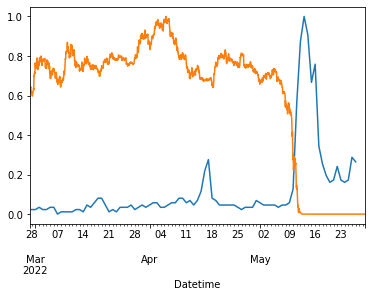

In [233]:
comparison('luna', 'LUNA1-USD')

<AxesSubplot:xlabel='date'>

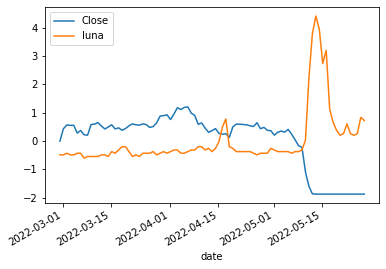

In [243]:
comparisonSS('luna', 'LUNA1-USD')

(<AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>)

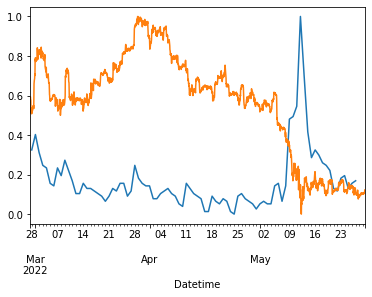

In [235]:
comparison('Bitcoin', "BTC-USD")

(<AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>)

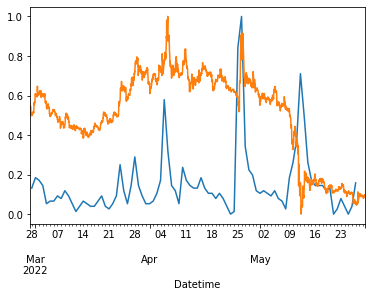

In [236]:
comparison('dogecoin', "DOGE-USD")

<AxesSubplot:xlabel='date'>

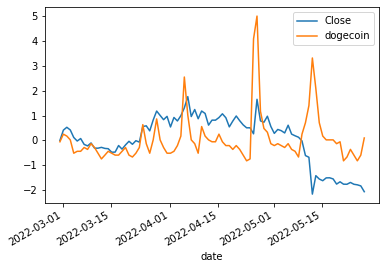

In [244]:
comparisonSS('dogecoin', "DOGE-USD")

(<AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>)

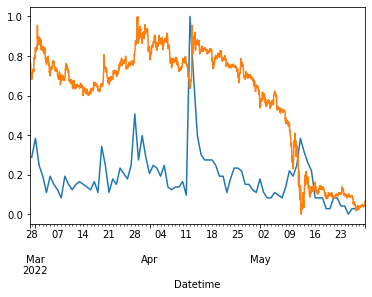

In [238]:
comparison('shiba', "SHIB-USD")

<AxesSubplot:xlabel='date'>

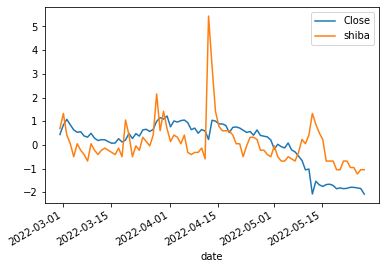

In [245]:
comparisonSS('shiba', "SHIB-USD")

(<AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>)

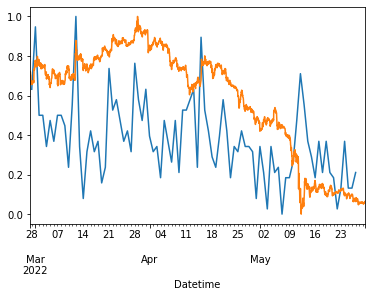

In [239]:
comparison('ripple', "XRP-USD")

<AxesSubplot:xlabel='date'>

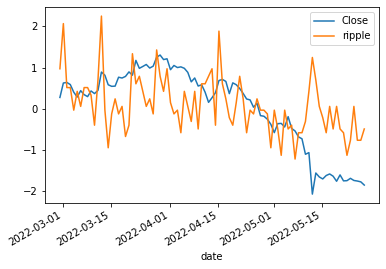

In [242]:
comparisonSS('ripple', "XRP-USD")

In [422]:
import tweepy
from dotenv import load_dotenv
import os
import pandas as pd
import re
load_dotenv()
from pathlib import Path
from nltk.corpus import reuters, stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
from wordcloud import WordCloud

In [269]:
tweepyClient = tweepy.Client("AAAAAAAAAAAAAAAAAAAAAGvbawEAAAAAxvxnJu9E%2F%2FPCe5Oz0irJC5BDvZM%3DEsqky8zPsYhadIeHKzCVsaB0UXGz28FFb2UBqtnNDOJkmfAkfN")

In [296]:
def tweets(start_time, end_time, iterations, query):
    datelist = pd.date_range(start_time, end_time, periods=iterations).tolist()
    tweets=[]
    date=[]
    counter = 0
    for time in datelist:
        if counter > 1:
            #Fetching Tweets
            response = tweepyClient.search_recent_tweets(
                query,
                max_results=10,
                start_time=start,
                end_time=time,
                tweet_fields=["created_at"])
    
            if type(response.data) != type(None):
                #Data Cleaning
                for resp in response.data:
                    # tweet = clean_tweet(resp)
                    tweet = str(resp)
                    tweets.append(tweet)
                    date.append(resp.created_at)
        counter=counter+1
        start=time
    tweet_df=pd.DataFrame({'time':date, 'tweet':tweets})
    tweet_df=tweet_df.sort_values(by='time', ascending=True).set_index('time')
    return tweet_df

In [484]:
df=tweets('2022-05-29', '2022-05-30', 10, 'luna lang:en')

In [485]:
df

,tweet
time,
2022-05-29 05:19:53+00:00,RT @altbullx: I booked 70% profits here...and ...
2022-05-29 05:19:54+00:00,@TrustlessState @0xRapha @ethStaker @0xRapha\n...
2022-05-29 05:19:55+00:00,@TheSandstormYT IT WAS A DISASTER .NOT ON ALL ...
2022-05-29 05:19:56+00:00,@Sinfullylu @mofchitman08 Luna wtf is this
2022-05-29 05:19:56+00:00,RT @binance: Current LUNA (old) holders may be...
...,...
2022-05-29 23:59:57+00:00,RT @Oly245: Great video on @XcademyOfficial by...
2022-05-29 23:59:57+00:00,@coinbase @CoinbaseSupport the community wants...
2022-05-29 23:59:57+00:00,RT @LunaBurnx: 🌕 WELCOME TO #LUNABURNX 🌕\n\n🔥U...


In [486]:
#cleaning
def cleaning(df):
    cleaned_tweets=[]
    for word in df['tweet']:
        #convert to string
        tw=str(word)
        #remove web links
        tw=re.sub(r"http\S+", "",tw)
        tw=re.sub(r"www\S+","",tw)
        #Remove mentions
        tw=re.sub(r"@\S+", "", tw)
        #remove non alphabetic characters
        tw=re.sub("[^A-Za-z0-9]"," ",tw)
        #remove rt
        tw=re.sub(r"RT","",tw)
        cleaned_tweets.append(tw.lower())
    df['cleaned_tweets']=cleaned_tweets
    return

In [487]:
cleaning(df)

In [488]:
df.head(10)

,tweet,cleaned_tweets
time,,
2022-05-29 05:19:53+00:00,RT @altbullx: I booked 70% profits here...and ...,i booked 70 profits here and my stoploss ...
2022-05-29 05:19:54+00:00,@TrustlessState @0xRapha @ethStaker @0xRapha\n...,luna is an example against a backdrop of...
2022-05-29 05:19:55+00:00,@TheSandstormYT IT WAS A DISASTER .NOT ON ALL ...,it was a disaster not on all exchanges and i...
2022-05-29 05:19:56+00:00,@Sinfullylu @mofchitman08 Luna wtf is this,luna wtf is this
2022-05-29 05:19:56+00:00,RT @binance: Current LUNA (old) holders may be...,current luna old holders may be noticing t...
2022-05-29 05:19:57+00:00,"RT @SB19axnxnxe: When Pablo released La Luna, ...",when pablo released la luna we knew that he...
2022-05-29 05:19:58+00:00,RT @AUTHORSwatiShi1: #ChampionsLeagueFinal goo...,championsleaguefinal good luck to all stra...
2022-05-29 05:19:59+00:00,RT @CryptoReloader: You lost your money throug...,you lost your money through dokwon you are ...
2022-05-29 05:19:59+00:00,RT @HuobiGlobal: $LUNA spot trading is now liv...,luna spot trading is now live market ht...


In [489]:
#tokenizer 
def tokenizer(df):
    sw = set(stopwords.words('english'))
    token_tweets=[]
    for tweet in df['cleaned_tweets']:
        words = word_tokenize(tweet)
        lem = [lemmatizer.lemmatize(word) for word in words]
        output=[word for word in lem if word not in sw]
        token_tweets.append(output)
    df['token_tweets']=token_tweets
    return

In [490]:
tokenizer(df)

In [491]:
df.head()

,tweet,cleaned_tweets,token_tweets
time,,,
2022-05-29 05:19:53+00:00,RT @altbullx: I booked 70% profits here...and ...,i booked 70 profits here and my stoploss ...,"[booked, 70, profit, stoploss, breakeven, full..."
2022-05-29 05:19:54+00:00,@TrustlessState @0xRapha @ethStaker @0xRapha\n...,luna is an example against a backdrop of...,"[luna, example, backdrop, wider, market, turbu..."
2022-05-29 05:19:55+00:00,@TheSandstormYT IT WAS A DISASTER .NOT ON ALL ...,it was a disaster not on all exchanges and i...,"[wa, disaster, exchange, staed, luna, classic,..."
2022-05-29 05:19:56+00:00,@Sinfullylu @mofchitman08 Luna wtf is this,luna wtf is this,"[luna, wtf]"
2022-05-29 05:19:56+00:00,RT @binance: Current LUNA (old) holders may be...,current luna old holders may be noticing t...,"[current, luna, old, holder, may, noticing, co..."


In [492]:
analyzer = SentimentIntensityAnalyzer()
def sentiment(df):
    compound=[]
    pos=[]
    neu=[]
    neg=[]
    for tweet in df['cleaned_tweets']:
        sentiment=analyzer.polarity_scores(tweet)
        compound.append(sentiment['compound'])
        pos.append(sentiment['pos'])
        neu.append(sentiment['neu'])
        neg.append(sentiment['neg'])
    df['compound']=compound
    df['pos']=pos
    df['neu']=neu
    df['neg']=neg
    return

In [493]:
sentiment(df)

In [494]:
df.head()

,tweet,cleaned_tweets,token_tweets,compound,pos,neu,neg
time,,,,,,,
2022-05-29 05:19:53+00:00,RT @altbullx: I booked 70% profits here...and ...,i booked 70 profits here and my stoploss ...,"[booked, 70, profit, stoploss, breakeven, full...",0.8481,0.338,0.662,0.000
2022-05-29 05:19:54+00:00,@TrustlessState @0xRapha @ethStaker @0xRapha\n...,luna is an example against a backdrop of...,"[luna, example, backdrop, wider, market, turbu...",-0.2732,0.000,0.946,0.054
2022-05-29 05:19:55+00:00,@TheSandstormYT IT WAS A DISASTER .NOT ON ALL ...,it was a disaster not on all exchanges and i...,"[wa, disaster, exchange, staed, luna, classic,...",-0.4434,0.068,0.805,0.127
2022-05-29 05:19:56+00:00,@Sinfullylu @mofchitman08 Luna wtf is this,luna wtf is this,"[luna, wtf]",-0.5859,0.000,0.441,0.559
2022-05-29 05:19:56+00:00,RT @binance: Current LUNA (old) holders may be...,current luna old holders may be noticing t...,"[current, luna, old, holder, may, noticing, co...",0.5165,0.186,0.814,0.000


In [479]:
lunaprice = yf.Ticker('LUNA1-USD')
lunaprice = lunaprice.history(
        start='2022-05-28',
        end='2022-05-30',
        interval='1m'
    )

In [480]:
lunaprice['Close']

Datetime
2022-05-27 14:00:00+00:00    0.000134
2022-05-27 14:01:00+00:00    0.000135
2022-05-27 14:02:00+00:00    0.000134
2022-05-27 14:03:00+00:00    0.000135
2022-05-27 14:04:00+00:00    0.000134
                               ...   
2022-05-29 13:53:00+00:00    0.000084
2022-05-29 13:55:00+00:00    0.000083
2022-05-29 13:56:00+00:00    0.000084
2022-05-29 13:58:00+00:00    0.000085
2022-05-29 13:59:00+00:00    0.000085
Name: Close, Length: 2377, dtype: float64

<AxesSubplot:xlabel='Datetime'>

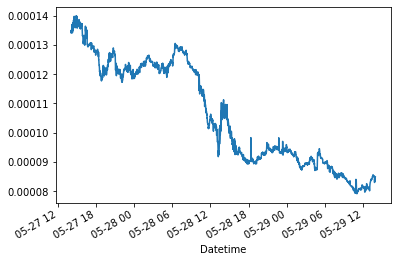

In [482]:
lunaprice['Close'].plot()

In [466]:
def wc(df):
    biglist=[]
    for tweets in df['token_tweets']:
        biglist=biglist+tweets
    bigstring=' '.join(biglist)
    wc=WordCloud().generate(bigstring)
    return plt.imshow(wc)

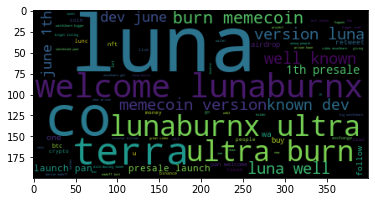

In [467]:
wc(df)